In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import calendar
import datetime
import math
from calendar import monthrange
data1 = pd.read_csv("C:\\MIS\\Referrals Dump - 2022-02-23.csv")
data2 = pd.read_csv("C:\\MIS\\Referrals_monthly_target_Feb.csv")
#data.head(5)
#data.isnull().sum()


C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (11,15,17,58) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [32]:
data2

,customer_type,product,sku,System,PA,Assisted,Regeneration
0,Amber,AL,HDFC AL,0,0,0.0,0
1,Amber,BL,Allahabad BL,0,0,0.0,0
2,Amber,BL,FLEXILOAN BL,18,25,30.0,0
3,Amber,BL,Lending Kart BL,85,53,60.0,0
4,Amber,BL,MAFL BL,0,0,0.0,0
...,...,...,...,...,...,...,...
154,Amber,BL,Neo Growth,10,30,0.0,0
155,Amber,BL,Aye Finance,0,0,0.0,0
156,Amber,HL,India Shelters,13,0,0.0,0
157,Amber,HL,HFFC HL,0,0,0.0,0


In [38]:
Ref_MIS = pd.merge(data1, data2, 
                   on='sku', 
                   how='left')
Ref_MIS.head(5)

,lead_id,user_id,first_name,phone_home,offer_application_number,offer_reference_number,first_profile_date,profile_id,customer_type_x,applied_da,...,oic_type,is_secondary_sale,is_primary_sale,is_aip_approved,customer_type_y,product_y,System,PA,Assisted,Regeneration
0,171550,85365,uday,8686776784,PLG1774FQN6QWG,OF00005984,17-11-2015 18:58,156300674,Green,13-02-2022,...,NaN,0,1,0,Amber,PL,0.0,0.0,0.0,0.0
1,171550,85365,uday,8686776784,PLG1774FQN6QWG,OF00005984,17-11-2015 18:58,156300674,Green,13-02-2022,...,NaN,0,1,0,Green,PL,0.0,0.0,0.0,0.0
2,173881,128376,Jatoth,9908282647,PLG177PRIVRCYK,OF00015540,26-12-2015 12:36,157259614,Green,13-02-2022,...,NaN,0,1,0,Amber,PL,0.0,0.0,0.0,0.0
3,173881,128376,Jatoth,9908282647,PLG177PRIVRCYK,OF00015540,26-12-2015 12:36,157259614,Green,13-02-2022,...,NaN,0,1,0,Green,PL,0.0,0.0,0.0,0.0
4,287937,1971,Harish,9555395051,CCR94CL0DFM77,LE140222645111,14-02-2022 14:20,158318667,Red,14-02-2022,...,NaN,0,1,0,Green,CC,637.0,686.0,400.0,0.0


In [5]:
data['profile_vintage'].describe()

count     101319
unique         3
top          M1+
freq       79520
Name: profile_vintage, dtype: object

In [6]:
data['lead_id'].describe()

count    1.013190e+05
mean     6.870153e+07
std      9.526726e+06
min      1.715500e+05
25%      7.037434e+07
50%      7.167881e+07
75%      7.201456e+07
max      7.242321e+07
Name: lead_id, dtype: float64

In [39]:
print(Ref_MIS.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185821 entries, 0 to 185820
Data columns (total 97 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   lead_id                   185821 non-null  int64  
 1   user_id                   185821 non-null  int64  
 2   first_name                185821 non-null  object 
 3   phone_home                185821 non-null  int64  
 4   offer_application_number  185821 non-null  object 
 5   offer_reference_number    68936 non-null   object 
 6   first_profile_date        185821 non-null  object 
 7   profile_id                185821 non-null  int64  
 8   customer_type_x           185821 non-null  object 
 9   applied_da                185821 non-null  object 
 10  send_to_lender_date       144018 non-null  object 
 11  not_interested_date       65 non-null      object 
 12  date_of_referral          142991 non-null  object 
 13  feedback_received_date    66277 non-null   o

In [40]:
Ref_MIS.columns

Index(['lead_id', 'user_id', 'first_name', 'phone_home',
       'offer_application_number', 'offer_reference_number',
       'first_profile_date', 'profile_id', 'customer_type_x', 'applied_da',
       'send_to_lender_date', 'not_interested_date', 'date_of_referral',
       'feedback_received_date', 'aip_approval_date', 'booking_date',
       'send_to_lender_oic', 'not_int_oic', 'date_of_referral_oic',
       'product_x', 'sku_slug', 'loan_amount', 'tenor', 'emi',
       'loan_disbursed_amount', 'assigned_oic', 'product_status',
       'appops_status_code', 'current_aos', 'document_status',
       'appointment_date', 'followup_date', 'utm_source', 'utm_term',
       'utm_medium', 'utm_campaign', 'dsa_name', 'profiled_utm_source',
       'alliance_flag', 'nw_flag', 'device_type', 'device_name', 'login_date',
       'modified_ts', 'inserted_at', 'lender', 'latest_crm', 'pass_423',
       'pass_280', 'pass_300', 'pass_390', 'pass_stage1_reject_stage',
       'pass_490', 'pass_690', 'pass_2

In [41]:
Ref_MIS.dtypes

lead_id                       int64
user_id                       int64
first_name                   object
phone_home                    int64
offer_application_number     object
                             ...   
product_y                    object
System                      float64
PA                          float64
Assisted                    float64
Regeneration                float64
Length: 97, dtype: object

In [40]:
#to find the working directory
#print("Current working directory: {0}".format(os.getcwd()))

Current working directory: C:\Users\User\Desktop\DS


In [42]:
#datetime.datetime.strptime(data.applied_date, '%d-%m-%Y %H:%M:%S').strftime('%d-%m-%Y')
pivot=pd.pivot_table(Ref_MIS,
                     values='lead_id',
                     index=['applied_da','lender'],
                     columns='appops_status_code',aggfunc='count',margins=True,margins_name='total_07')
pivot=pivot.fillna(0).astype(np.int64)
pivot

appops_status_code        89  140   150   200  210  230   240   250  261  \
applied_da lender                                                          
01-02-2022 AXIS BANK       0    0     0     0    0    0     0     0    0   
           CASHE           0    0     0     0    0    0     0     0    0   
           CITI            0    0     0     0    0    0     0     0    0   
           CashE           0   24     2     0    0    0     0     0    0   
           EARLYSALARYPL   0    0     0     0    0    0     0     0    0   
...                       ..  ...   ...   ...  ...  ...   ...   ...  ...   
23-02-2022 Sme Corner      0    2     0     0    0    0     0     0    0   
           Triti           0    0     0     0    0    0     0     0    0   
           Upwards         0    0     0     0    0    0     2     0    0   
           Yes Bank        0    0     0     0    0    0     4     0    0   
total_07                  36  613  2637  1220   41   22  3266  1253   54   

appops_status_code          270  ...   480   490  500   580   590  680  690  \
applied_da lender                ...                                          
01-02-2022 AXIS BANK          6  ...     0     0    0     0     0    0    0   
           CASHE              2  ...     1     0    0     0     1    0    0   
           CITI              30  ...     0     0    0     0     0    0    0   
           CashE              0  ...    28    30    0     4     4    0    0   
           EARLYSALARYPL      0  ...     0     0    0     6     0    0    0   
...                         ...  ...   ...   ...  ...   ...   ...  ...  ...   
23-02-2022 Sme Corner        36  ...     0     0    0     0     0    0    0   
           Triti             24  ...     0     0    0     0     0    0    0   
           Upwards            0  ...     0     0    0     0     0    0    0   
           Yes Bank         220  ...     0     0    0     0     0    0    0   
total_07                  19823  ...  7516  6476  226  2189  2145   93   16   

appops_status_code        710   990  total_07  
applied_da lender                              
01-02-2022 AXIS BANK        0     0        22  
           CASHE            0     1        48  
           CITI             2     0        32  
           CashE            0    20       592  
           EARLYSALARYPL    0     4        48  
...                       ...   ...       ...  
23-02-2022 Sme Corner       0     0        40  
           Triti            0     0        30  
           Upwards          0     0        52  
           Yes Bank         0     0       270  
total_07                   49  2496    185817  

[709 rows x 34 columns]

In [ ]:
pivot=pd.pivot_table(Ref_MIS,
                     values='lead_id',
                     index=['applied_da','lender'],
                     columns=['MTD Actuals','Target'],aggfunc='count',margins=True,margins_name='total_07')
pivot=pivot.fillna(0).astype(np.int64)
pivot

In [44]:
pivot=pd.pivot_table(Ref_MIS,
                     values='lead_id',
                     index=['product_y','lender'],
                     columns='appops_status_code',aggfunc='count',margins=True,margins_name='total_07')
pivot=pivot.fillna(0).astype(np.int64)
pivot

appops_status_code            89  140   150   200  210  230   240  250  261  \
product_y lender                                                              
BL        FLEXILOAN            0   20     8     0    0    0     0    0    0   
          INDIFI               4    0    10     0    0    0     0   20    0   
          Lending Kart         4    2     6     0    0    0    62    0    0   
          Sme Corner           0    6     0     0    0    0     0    0    0   
          Triti                0   32     4     0    0    0     8    0    0   
CC        CITI                 0    0   132     0    0    0     2    0    0   
          HDFC                 2    0   100     0    0    0    86    0   54   
          ICICI                0    0     2     0    0    0     0    0    0   
          RBL                  0    0     6     0    0    0   362    0    0   
          SBI                  0    8     2     0    0    0    86    0    0   
          SCB                  0    0    10     0    0    0    74    0    0   
          Yes Bank             0    0    10     0    0    0    24    0    0   
HL        PNB                  0    0     0     0    0    0     0    4    0   
HLBT      PNB                  0    0     0     0    0    0     0    0    0   
LAP       PNB                  0    0     2     0    0    0     0    0    0   
PL        HDFC                 0    2    34     0    0    0     0    0    0   
          Yes Bank             0    0     2     0    0    0     0    0    0   
          EARLYSALARYPL        0    0    11     0    0    0    16    0    0   
          Faircent             0    2     2     0    0    0    12    0    0   
          HDFCEMERGINGMARKET   0   14    42     0    0    0     4    0    0   
          IDFC                 0    8     0     0    0    0     8    0    0   
          IDFCPROGB            0    0     0     0    0    0     0    0    0   
          MUTHOOT              0    0    36     0    2    0     0  132    0   
          Shriram             22   52    32   638   26   10    50  146    0   
SBPL      MUTHOOT              0    0     8     0    0    0     0   25    0   
          Shriram              4   18    26   582   10   12    14  114    0   
STBL      CashE                0  282    44     0    0    0    62    0    0   
          Early Salary         0   36   210     0    0    0  1330    0    0   
          KREDITBEE            0    4  1572     0    0    0   674    0    0   
          MONEYVIEW            0   94   104     0    0    0   192    0    0   
          Paysense             0    0    26     0    0    0     2    0    0   
          Upwards              0    0     0     0    0    0    28    0    0   
total_07                      36  580  2441  1220   38   22  3096  441   54   

appops_status_code              270  ...   480   490  500   580   590  680  \
product_y lender                     ...                                     
BL        FLEXILOAN             310  ...    16     0    2     2     0    0   
          INDIFI                248  ...     0     0    0     0     0    0   
          Lending Kart            4  ...     0     0    0     0     0    0   
          Sme Corner            344  ...     0     0    0     0     0    0   
          Triti                 436  ...     0     2    0     0     0    0   
CC        CITI                  970  ...     0     0    0     0     0    0   
          HDFC                    6  ...     0     0    0     0     0    0   
          ICICI                   0  ...     0     0    0     0     0    0   
          RBL                     0  ...     0     0    0     0     0    0   
          SBI                   186  ...     0     0    0     0     0   58   
          SCB                     0  ...     0     0    0     0     0    0   
          Yes Bank             3064  ...     0     0    0     0     0    0   
HL        PNB                     6  ...     0     0    0     0     0    0   
HLBT      PNB                     2  ...     0     0    0     0 

In [45]:
new_pivot=pivot.assign(S2L = 
                 lambda x: x.total_07*1.11,  
                 Convers =
                 lambda x: x.total_07/1.11)
new_pivot

appops_status_code            89  140   150   200  210  230   240  250  261  \
product_y lender                                                              
BL        FLEXILOAN            0   20     8     0    0    0     0    0    0   
          INDIFI               4    0    10     0    0    0     0   20    0   
          Lending Kart         4    2     6     0    0    0    62    0    0   
          Sme Corner           0    6     0     0    0    0     0    0    0   
          Triti                0   32     4     0    0    0     8    0    0   
CC        CITI                 0    0   132     0    0    0     2    0    0   
          HDFC                 2    0   100     0    0    0    86    0   54   
          ICICI                0    0     2     0    0    0     0    0    0   
          RBL                  0    0     6     0    0    0   362    0    0   
          SBI                  0    8     2     0    0    0    86    0    0   
          SCB                  0    0    10     0    0    0    74    0    0   
          Yes Bank             0    0    10     0    0    0    24    0    0   
HL        PNB                  0    0     0     0    0    0     0    4    0   
HLBT      PNB                  0    0     0     0    0    0     0    0    0   
LAP       PNB                  0    0     2     0    0    0     0    0    0   
PL        HDFC                 0    2    34     0    0    0     0    0    0   
          Yes Bank             0    0     2     0    0    0     0    0    0   
          EARLYSALARYPL        0    0    11     0    0    0    16    0    0   
          Faircent             0    2     2     0    0    0    12    0    0   
          HDFCEMERGINGMARKET   0   14    42     0    0    0     4    0    0   
          IDFC                 0    8     0     0    0    0     8    0    0   
          IDFCPROGB            0    0     0     0    0    0     0    0    0   
          MUTHOOT              0    0    36     0    2    0     0  132    0   
          Shriram             22   52    32   638   26   10    50  146    0   
SBPL      MUTHOOT              0    0     8     0    0    0     0   25    0   
          Shriram              4   18    26   582   10   12    14  114    0   
STBL      CashE                0  282    44     0    0    0    62    0    0   
          Early Salary         0   36   210     0    0    0  1330    0    0   
          KREDITBEE            0    4  1572     0    0    0   674    0    0   
          MONEYVIEW            0   94   104     0    0    0   192    0    0   
          Paysense             0    0    26     0    0    0     2    0    0   
          Upwards              0    0     0     0    0    0    28    0    0   
total_07                      36  580  2441  1220   38   22  3096  441   54   

appops_status_code              270  ...  500   580   590  680  690  710  \
product_y lender                     ...                                   
BL        FLEXILOAN             310  ...    2     2     0    0    0    0   
          INDIFI                248  ...    0     0     0    0    0    0   
          Lending Kart            4  ...    0     0     0    0    0    0   
          Sme Corner            344  ...    0     0     0    0    0    0   
          Triti                 436  ...    0     0     0    0    0    0   
CC        CITI                  970  ...    0     0     0    0    0    4   
          HDFC                    6  ...    0     0     0    0    0    0   
          ICICI                   0  ...    0     0     0    0    0    0   
          RBL                     0  ...    0     0     0    0    0    0   
          SBI                   186  ...    0     0     0   58    0    2   
          SCB                     0  ...    0     0     0    0    0    0   
          Yes Bank             3064  ...    0     0     0    0    0    6   
HL        PNB                     6  ...    0     0     0    0    0    0   
HLBT      PNB                     2  ...    0     0     0    0    0    0   
LAP       PNB     

In [24]:
import csv

# write the pivot to the csv file

new_pivot.to_csv("C:\\MIS\\Referrals_MIS.csv", index = False, header=True)

print(new_pivot)


appops_status_code        89  140   150  200  210  230  240  250   270  280  \
applied_date lender                                                           
01-11-2021   AXIS BANK     0    0     0    0    0    0    0    0     6    0   
             CASHE         0    2     0    0    0    0    0    0     0    0   
             CITI          0    0     0    0    0    0    0    0     6    2   
             Canara Bank   0    0     0    0    0    0    0    0     1    0   
             CashE         0    9     1    0    0    0    0    0     0    0   
...                       ..  ...   ...  ...  ...  ...  ...  ...   ...  ...   
05-11-2021   Triti         0    0     0    0    0    0    0    0    13    0   
             UNI           0    0     0    0    0    0    0    0     1    0   
             Upwards       0    0     0    0    0    0    1    0     0    0   
             Yes Bank      0    0     1    0    5    0    4    0    32    2   
total                     10   41  1040   70  204   

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.relplot(data=sp500_history[['Close', 'Close_200ma']], kind='line', height=3, aspect=2.0)
plt.savefig('chart.png')

# HTML

In [60]:
# 1. Set up multiple variables to store the titles, text within the report
page_title_text='My report'
title_text = 'Daily Regeneration Summary Report'
text = 'Hello, welcome to today's report!'
prices_text = 'DTD Summary Report'
stats_text = 'MTD Summary Report'


# 2. Combine them together using a long f-string
html = f'''
    <html>
        <head>
            <title>{page_title_text}</title>
        </head>
        <body>
            <h1>{title_text}</h1>
            <p>{text}</p>
             <img src='plot.png' width="700">
            <h2>{prices_text}</h2>
             {new_pivot.tail(3).to_html()}
            <h2>{stats_text}</h2>
            {new_pivot.to_html()}
        </body>
    </html>
    '''
# 3. Write the html string as an HTML file
with open('new_pivot.html', 'w') as f:
    f.write(html)

In [59]:
#nos. of 370
filtered_df = data[(data["appops_status_code"] == 370)]
pivot=pd.pivot_table(filtered_df,
                     values='lead_id',
                     index=['lender'],
                     columns='appops_status_code',aggfunc='count',margins=True,margins_name='total')
pivot=pivot.fillna(0).astype(np.int64)
pivot


appops_status_code,370,total
lender,,
CASHE,94,94
CashE,259,259
EARLYSALARYPL,21,21
Early Salary,672,672
Faircent,107,107
KREDITBEE,1551,1551
Lending Kart,31,31
MONEYVIEW,752,752
Paysense,34,34


In [15]:
filtered_df = data[(data["appops_status_code"] == 370)]
filtered_df[1:]

,lead_id,user_id,first_name,phone_home,offer_application_number,offer_reference_number,first_profile_date,profile_id,customer_type,applied_date,...,regen_sku,regen_leads,ref_oic,attribution,name,team,oic_type,is_secondary_sale,is_primary_sale,is_aip_approved
8,4054821,2433396,Mohan,9900259012,CCG609LDVLOFKZ,NaN,18-08-2017 23:53,153422103,Green,05-11-2021,...,NaN,NaN,PORTFOLIO,PA,NaN,NaN,NaN,0,1,0
10,4901113,2839700,Shagufta,9619066442,CCG609DQYLU3MD,NaN,04-10-2017 18:34,153422388,Green,01-11-2021,...,NaN,NaN,System,System,NaN,NaN,NaN,0,1,0
16,5574222,368880,Ashok,9823287711,STBLG5419L87OA7X,NaN,28-07-2017 22:06,153409220,Green,05-11-2021,...,IDFC Personal Loan,66718212,PORTFOLIO,PA,NaN,NaN,NaN,0,1,0
18,5846048,2453173,Chandrakishor,7870852958,STBLA552FRZFEBG2,NaN,21-08-2017 09:29,153750457,Amber,04-11-2021,...,NaN,NaN,PORTFOLIO,PA,NaN,NaN,NaN,0,1,0
20,6252929,3580924,vishnu,9929541089,STBLG545KJPIO2V0,NaN,21-11-2017 22:48,153786632,Green,05-11-2021,...,NaN,NaN,System,System,NaN,NaN,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11040,69237839,22565353,Shivaji,9913882965,STBLG541DGLPLDQ4,NaN,05-11-2021 23:11,153803930,Green,05-11-2021,...,NaN,NaN,System,System,NaN,NaN,NaN,0,1,0
11047,69237919,20692561,ANUJ,7903008596,STBLG541J7TEILWE,NaN,03-11-2020 00:35,153290389,Green,05-11-2021,...,NaN,NaN,PORTFOLIO,PA,NaN,NaN,NaN,1,0,0
11049,69237923,22304930,SARA,8879118943,STBLG541JMBRRSBN,NaN,21-09-2021 19:06,153468481,Green,05-11-2021,...,NaN,NaN,PORTFOLIO,PA,NaN,NaN,NaN,0,1,0
11053,69238156,19388672,ISHTIYAK,8803002380,STBLG545UG5ECGEU,NaN,02-02-2020 23:48,153440332,Green,05-11-2021,...,NaN,NaN,PORTFOLIO,PA,NaN,NaN,NaN,1,0,0


In [ ]:
pivot=pd.pivot_table(data,
                     values='lead_id',
                     index=['lender'],
                     columns=['appops_status_code'],aggfunc='count',margins=True,margins_name='total')
pivot=pivot.fillna(0).astype(np.int64)
pivot


<AxesSubplot:title={'center':'Summary'}, xlabel='appops_status_code'>

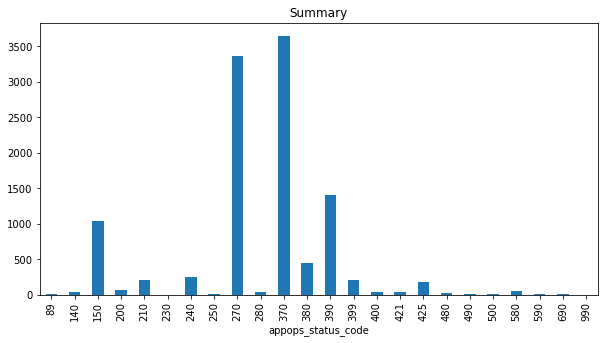

In [49]:
data.groupby('appops_status_code').size().plot( kind='bar', title='Summary', figsize=(10,5) )

In [52]:
#Regeneration Summary Report
filtered = data[data['ref_oic'] == 'Regeneration']
pivot=pd.pivot_table(filtered,
                     values='lead_id',
                     index=['applied_date','lender'],
                     columns='appops_status_code',aggfunc='count',margins=True,margins_name='total')
pivot=pivot.fillna(0).astype(np.int64)
pivot

appops_status_code         140  150  240  270  370  380  390  399  500  580  \
applied_date lender                                                           
01-11-2021   Early Salary    0    1    5    0   61    0    3  105    1   21   
             Faircent        0    0    1   39    8    0    0    0    0    0   
             Finzy           0    0    4    0    0    3   11    0    0    0   
             KREDITBEE       0    0    0    0  222    0   26    1    0    0   
             Triti           2    0    0    3    1    0    0    0    0    0   
02-11-2021   Early Salary    0    2    8    0  111    0  268    0    0    0   
             Faircent        0    0    0   25    3    0    0    0    0    0   
             Finzy           0    0    4    0    0    3   18    0    0    0   
             KREDITBEE       0    0    0    0  154    0   35    2    0    0   
03-11-2021   Early Salary    0    1    7    0   57    0  126    0    0    0   
             Faircent        0    0    0   44    4    0    0    0    0    0   
             KREDITBEE       0    0    0    0  163    0   30    5    0    0   
05-11-2021   Early Salary    0  274    7    0  103    0   49    0    0    0   
             Faircent        0    0    0   43    4    0    0    0    0    0   
             Finzy           0    0    2    0    0    2    7    0    0    0   
             KREDITBEE       0    0    0    5   34    0    0    0    0    0   
             RBL             0    0    0    0    4    7    2    0    0    0   
             Triti           0    0    0    9    1    0    0    0    0    0   
total                        2  278   38  168  930   15  575  113    1   21   

appops_status_code         690  total  
applied_date lender                    
01-11-2021   Early Salary    5    202  
             Faircent        0     48  
             Finzy           0     18  
             KREDITBEE       0    249  
             Triti           0      6  
02-11-2021   Early Salary    0    389  
             Faircent        0     28  
             Finzy           0     25  
             KREDITBEE       0    191  
03-11-2021   Early Salary    0    191  
             Faircent        0     48  
             KREDITBEE       0    198  
05-11-2021   Early Salary    0    433  
             Faircent        0     47  
             Finzy           0     11  
             KREDITBEE       0     39  
             RBL             0     13  
             Triti           0     10  
total                        5   2146

In [ ]:
DTD = math.ceil(target / days_in_current_month)
DTD

In [16]:
#Regeneration Daily DRR
pivot = pd.DataFrame([('Early Salary', 8000),
                   ('Faircent', 224),
                   ('Triti', 222),
                   ('KREDITBEE', 7000)],
           columns=('Regen_lender', 'target')
                 )
pivot


,Regen_lender,target
0,Early Salary,8000
1,Faircent,224
2,Triti,222
3,KREDITBEE,7000


In [ ]:
days_in_current_month = calendar.monthrange(today.year, today.month)[1]
days_till_end_month = days_in_current_month - today.day
start_date = today + datetime.timedelta(days=days_till_end_month + 1)
end_date = start_date
DTD = math.ceil(targets / days_in_current_month)

In [ ]:
today = datetime.date.today()
today

<AxesSubplot:xlabel='applied_date,lender'>

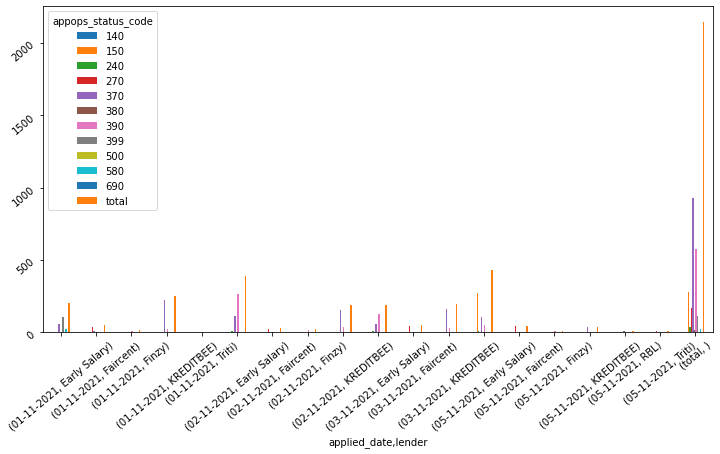

In [56]:
plot = pivot.plot(kind='bar',figsize=(12,6))
plot.tick_params(rotation=40)
plot

In [67]:
import datetime

#Converting to HTML
# saving plot image to local file
image = plot.get_figure().savefig('plot.png')
image_tag = '<img src="plot.png">'
#writing HTML Content
heading = '<h1> Automated Report </h1>'
subheading = '<h3> Sample Referrals Report </h3>'
# Using .now() from datetime library to add Time stamp
today = datetime.date.today()

#now = datetime.now()
current_time = today.strftime("%m/%d/%Y %H:%M:%S")
header = '<div class="top">' + heading + subheading + '</div>'
footer = '<div class="bottom"><h3> This Report has been Generated\n on '+ current_time +'</h3> </div>'
content = '<div class="table"> '+ pivot.to_html() +'</div>'
          #'<div class="chart"> '+ image_tag + '</div>
# Concating everything to a single string
html = header + content + footer

In [ ]:
#DSA_B Summary Report
filtered = data[data['dsa_name'] == 'B']
pivot=pd.pivot_table(filtered,
                     values='lead_id',
                     index=['applied_date','lender'],
                     columns='appops_status_code',aggfunc='count',margins=True,margins_name='total')
pivot=pivot.fillna(0).astype(np.int64)
pivot

In [ ]:
#DSA_C Summary Report
filtered = data[data['dsa_name'] == 'C']
pivot=pd.pivot_table(filtered,
                     values='lead_id',
                     index=['applied_date','lender'],
                     columns='appops_status_code',aggfunc='count',margins=True,margins_name='total')
pivot=pivot.fillna(0).astype(np.int64)
pivot

In [ ]:
#Networks Summary Report
print('Networks Summary Report')
filtered = data[[data['profile_vintage'] == 'M0'] and data['profiled_utm_source'] == 'intellectads_IC5']
pivot=pd.pivot_table(filtered,
                     values='lead_id',
                     index=['applied_date','lender'],
                     columns='appops_status_code',aggfunc='count',margins=True,margins_name='total')
pivot=pivot.fillna(0).astype(np.int64)
pivot

In [66]:
print('Day-wise Summary Report')
print(data['applied_date'].value_counts())

Day-wise Summary Report
05-11-2021    3979
01-11-2021    2287
02-11-2021    1973
03-11-2021    1834
04-11-2021     982
Name: applied_date, dtype: int64


In [ ]:
orange = sns.light_palette("orange", as_cmap=True)
pd.crosstab(index=[pivot['applied_date'], pivot['attribution']], columns=[pivot['appops_status_code'], pivot['lender']], colnames=['meal', 'party_people_size']).rename(columns={"Lunch": "count_lunch_meals_served", "Dinner": "count_dinner_meals_served"}).style.background_gradient(cmap=orange)

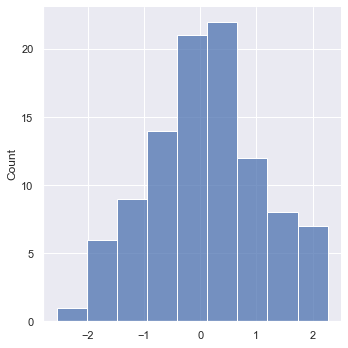

In [65]:
sns.set()
np.random.seed(0)
x = np.random.randn(100)

sns.displot(x)